<a href="https://colab.research.google.com/github/CodeRockerr/Projects/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 33.6MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.9MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**CNN Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


**Generators** are used to process large amount of data

In [ ]:
#generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


**Normalize**

In [ ]:
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Create **CNN** **Model**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 110ms/step - loss: 1.2600 - accuracy: 0.6012 - val_loss: 0.5992 - val_accuracy: 0.6920
Epoch 2/10
625/625 [==============================] - 92s 147ms/step - loss: 0.5721 - accuracy: 0.7078 - val_loss: 0.5532 - val_accuracy: 0.7178
Epoch 3/10
625/625 [==============================] - 75s 118ms/step - loss: 0.4767 - accuracy: 0.7768 - val_loss: 0.4547 - val_accuracy: 0.7886
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4217 - accuracy: 0.8096 - val_loss: 0.7036 - val_accuracy: 0.6340
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3814 - accuracy: 0.8309 - val_loss: 0.5934 - val_accuracy: 0.7528
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3023 - accuracy: 0.8676 - val_loss: 0.5351 - val_accuracy: 0.7150
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2302 - accuracy: 0.9060 - val_loss: 0.6344 - val_ac

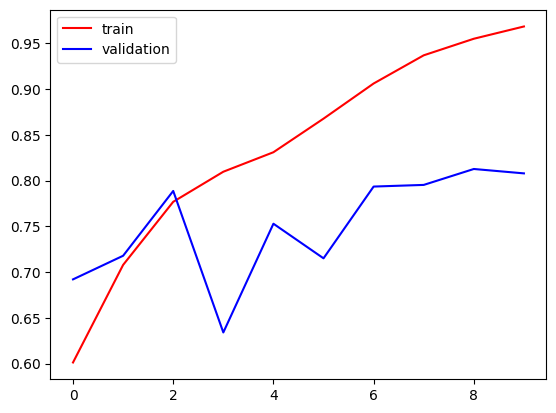

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

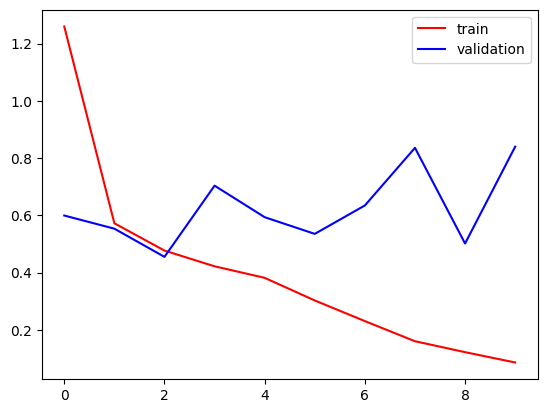

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

Ways to reduce Overfitting

1. Add more data
2. Data Augmentation -> next video
3. L1/L2 Regularizer
4. **Dropout**
5. **Batch** **Norm**
6. Reduce Complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/labrador-retrieve.jpg')

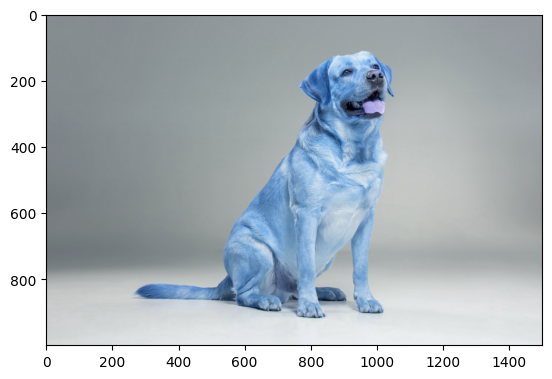

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1000, 1500, 3)

In [ ]:
test_img = cv2.resize(test_img,(256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 297ms/step


array([[1.]], dtype=float32)

1/1 [==============================] - 0s 45ms/step


array([[0.]], dtype=float32)

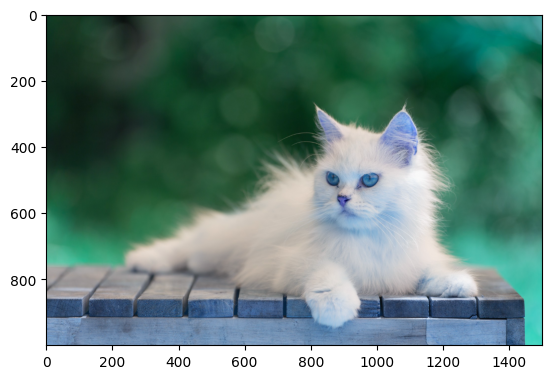

In [ ]:
test_img = cv2.imread('/content/white-cat-garden.jpg')
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img,(256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)